In [1]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
cd MyDrive/MCM/data

/content/drive/MyDrive/MCM/data


In [4]:
!ls

drive  sample_data


In [ ]:
!cd ./drive/MyDrive/MCM/data

/bin/bash: line 0: cd: ./drive/MyDrive/MCM/data: No such file or directory


In [12]:
data = pd.read_csv('nlp.csv').drop(columns='Unnamed: 0')
data.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,short_3,short_4,short_5,all_1,all_2,all_3,all_4,all_5,ratio,ie
0,12/31/2022,560,manly,20380,1899,0,2,17,37,29,...,184,669,1418,8,151,1142,4771,8782,0.093180,0
1,12/30/2022,559,molar,21204,1973,0,4,21,38,26,...,137,702,1459,12,93,957,4813,8979,0.093048,0
2,12/29/2022,558,havoc,20001,1919,0,2,16,38,30,...,64,544,1696,0,15,449,3937,10453,0.095945,0
3,12/28/2022,557,impel,20160,1937,0,3,21,40,25,...,77,524,1703,1,20,372,3681,10780,0.096081,0
4,12/26/2022,555,judge,20011,2043,0,2,8,16,26,...,68,617,1606,6,40,389,3552,10867,0.102094,0


In [13]:
test = pd.read_csv('test.csv').drop(columns='Unnamed: 0')
test


,Word,word_format,max_word_repetition,diff_score,syllable,brown_freq,reuters_freq,Length,Freq_HAL,Log_Freq_HAL,...,short_2,short_3,short_4,short_5,all_1,all_2,all_3,all_4,all_5,ie
0,eerie,11231,3,1,2,2,0,5,772,6.65,...,12,151,833,1312,2,79,987,4659,9127,1


In [14]:
# data = data[['word_format',
#        'max_word_repetition', 'diff_score', 'syllable', 'brown_freq',
#        'reuters_freq', 'label', 'Length', 'Freq_HAL', 'Log_Freq_HAL',
#        'I_Mean_RT', 'I_Zscore', 'I_SD', 'Obs', 'I_Mean_Accuracy', 'f', 'g',
#        'j', 'm', 'p', 'q', 'v', 'w', 'x', 'z', 'oo', 'ir', 'ph', 'ly', 've',
#        'wh', 'sk', 'ch', 'ck', 'ng', 'qu', 'th', 'label2', 'label3', 'short_1',
#        'short_2', 'short_3', 'short_4', 'short_5', 'all_1', 'all_2', 'all_3',
#        'all_4', 'all_5', 'ratio', 'ie']]
X_data = data[['word_format',
       'max_word_repetition', 'diff_score', 'syllable', 'brown_freq',
       'reuters_freq', 'Freq_HAL', 'Log_Freq_HAL',
       'I_Mean_RT', 'I_Zscore', 'I_SD', 'Obs', 'I_Mean_Accuracy', 'f', 'g',
       'j', 'm', 'p', 'q', 'v', 'w', 'x', 'z', 'oo', 'ir', 'ph', 'ly', 've',
       'wh', 'sk', 'ch', 'ck', 'ng', 'qu', 'th','ie','short_1',
       'short_2', 'short_3', 'short_4', 'short_5', 'all_1', 'all_2', 'all_3',
       'all_4', 'all_5']]
y_data = data['label']

In [15]:
X_data

,word_format,max_word_repetition,diff_score,syllable,brown_freq,reuters_freq,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,...,short_1,short_2,short_3,short_4,short_5,all_1,all_2,all_3,all_4,all_5
0,12345,1,1,2,2,0,805,6.69,724.48,-0.30,...,2,35,184,669,1418,8,151,1142,4771,8782
1,12345,1,1,2,1,0,522,6.26,802.80,-0.06,...,2,8,137,702,1459,12,93,957,4813,8979
2,12345,1,1,2,3,1,1555,7.35,793.41,0.02,...,0,4,64,544,1696,0,15,449,3937,10453
3,12345,1,1,2,0,0,394,5.98,697.67,-0.13,...,0,4,77,524,1703,1,20,372,3681,10780
4,12345,1,0,1,38,16,28177,10.25,599.12,-0.61,...,3,14,68,617,1606,6,40,389,3552,10867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,12345,1,0,1,79,6,19872,9.90,560.18,-0.73,...,3,31,177,580,1517,6,82,662,3366,10738
324,12345,1,0,1,1,8,10492,9.26,736.65,-0.19,...,0,14,133,756,1405,1,56,595,4183,10019
325,12314,2,0,1,1,0,832,6.72,737.86,-0.18,...,2,19,154,765,1368,5,96,974,4835,8944
326,12345,1,0,1,1,0,3334,8.11,622.81,-0.54,...,6,39,199,639,1425,13,107,769,3708,10257


In [16]:
test_X = test[['word_format',
       'max_word_repetition', 'diff_score', 'syllable', 'brown_freq',
       'reuters_freq', 'Freq_HAL', 'Log_Freq_HAL',
       'I_Mean_RT', 'I_Zscore', 'I_SD', 'Obs', 'I_Mean_Accuracy', 'f', 'g',
       'j', 'm', 'p', 'q', 'v', 'w', 'x', 'z', 'oo', 'ir', 'ph', 'ly', 've',
       'wh', 'sk', 'ch', 'ck', 'ng', 'qu', 'th','ie','short_1',
       'short_2', 'short_3', 'short_4', 'short_5', 'all_1', 'all_2', 'all_3',
       'all_4', 'all_5']]
test_X

,word_format,max_word_repetition,diff_score,syllable,brown_freq,reuters_freq,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,...,short_1,short_2,short_3,short_4,short_5,all_1,all_2,all_3,all_4,all_5
0,11231,3,1,2,2,0,772,6.65,798.48,0.12,...,0,12,151,833,1312,2,79,987,4659,9127


In [ ]:
X_data.shape

(328, 46)

In [17]:
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.multioutput import MultiOutputRegressor

X = X_data
# vector with target values
y = y_data


In [ ]:
#use only last stable values
X = X.iloc[:-220,:]
y = y.iloc[:-220]
print(X.shape,y.shape)

(108, 46) (108,)


In [59]:
from sklearn import ensemble

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.1, random_state = 122)#122
# train_X, test_X, train_y, test_y = X.iloc[:30,:], X.iloc[30:,:], y.iloc[:30,:], y.iloc[30:,:]

print(f"{train_X.shape[0]} train samples with {train_X.shape[1]} columns")
print(f"{test_X.shape[0]} test samples with {test_X.shape[1]} columns")

# Instantiation
xgb_r = XGBClassifier(objective ='multi:softprob',#'reg:linear','reg:squarederror'
                  n_estimators = 10, seed = 100, reg_lambda=0.1, reg_alpha=0)

# xgb_r = ensemble.RandomForestRegressor(n_estimators=10, criterion = "squared_error") #{“squared_error”, “absolute_error”, “friedman_mse”, “poisson”}
# Fitting the model
xgb_r.fit(train_X, train_y)
  
# Predict the model
pred = xgb_r.predict(train_X)


# pred = pred/np.sum(pred,axis=1).repeat(7,axis=0).reshape(30,7)*100

# print(pred)
# RMSE Computation
# print(test_y)
# print(pred)
accuracy = accuracy_score(train_y, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


295 train samples with 46 columns
33 test samples with 46 columns
Accuracy: 73.90%


In [85]:
pred = xgb_r.predict(train_X)
print(train_X.shape)
result = train_X.merge(data)
result = result[['Word']]
result['type'] = 'train'
print(result.shape)
result['pred'] = pred
result['label'] = train_y
print(result.shape)
print(result.head())
accuracy = accuracy_score(train_y, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

(295, 46)
(295, 2)
(295, 4)
    Word   type  pred  label
0  leave  train     2    2.0
1  depth  train     2    2.0
2  baker  train     3    2.0
3  humor  train     2    2.0
4  class  train     2    1.0
Accuracy: 73.90%


In [88]:
pred = xgb_r.predict(test_X)
print(test_X.shape)
result2 = test_X.merge(data)
result2 = result2[['Word']]
result2['type'] = 'test'
print(result2.shape)
result2['pred'] = pred
result2['label'] = test_y.values
print(result2.shape)
print(result2.head())
accuracy = accuracy_score(test_y, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

(33, 46)
(33, 2)
(33, 4)
    Word  type  pred  label
0  merit  test     3      3
1  renew  test     2      2
2  undue  test     1      2
3  glean  test     2      2
4  irony  test     2      2
Accuracy: 72.73%


In [91]:
final_result = pd.concat([result, result2], axis=0)
print(final_result.shape)
print(final_result.tail())
final_result.to_csv('question3_result.csv')

(328, 4)
     Word  type  pred  label
28  elder  test     1    1.0
29  aphid  test     2    2.0
30  query  test     2    1.0
31  midge  test     2    2.0
32  buggy  test     1    3.0


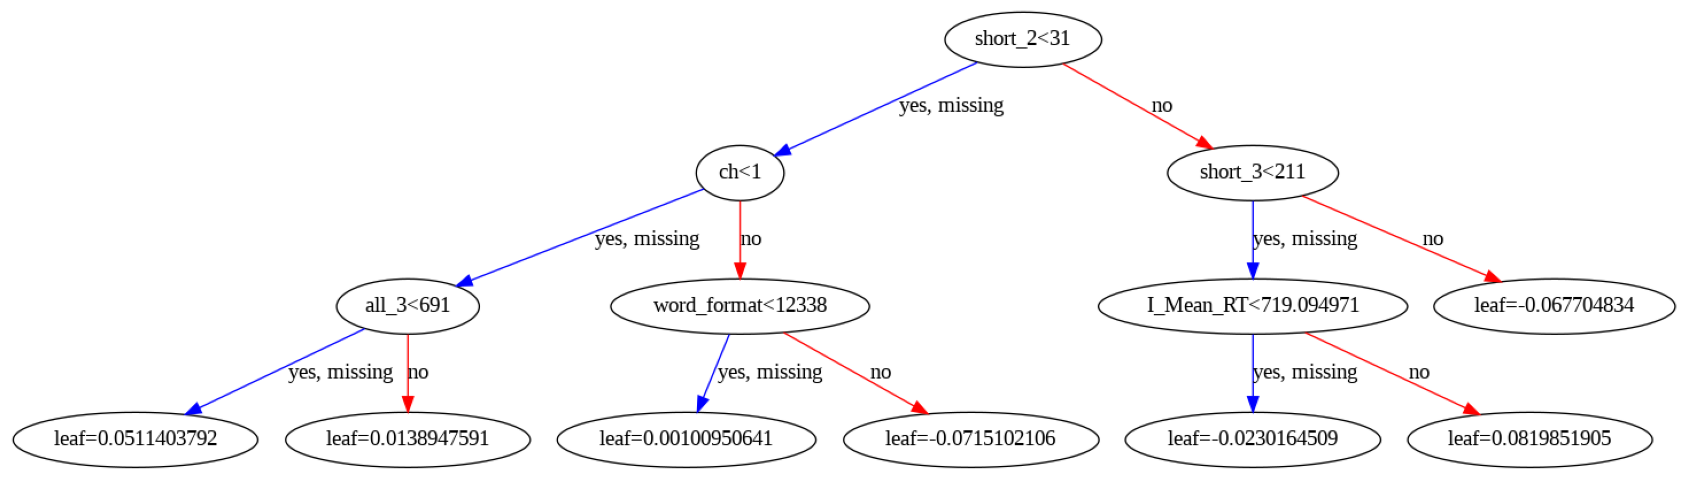

In [53]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(xgb_r, num_trees=10, ax=ax)
plt.show()

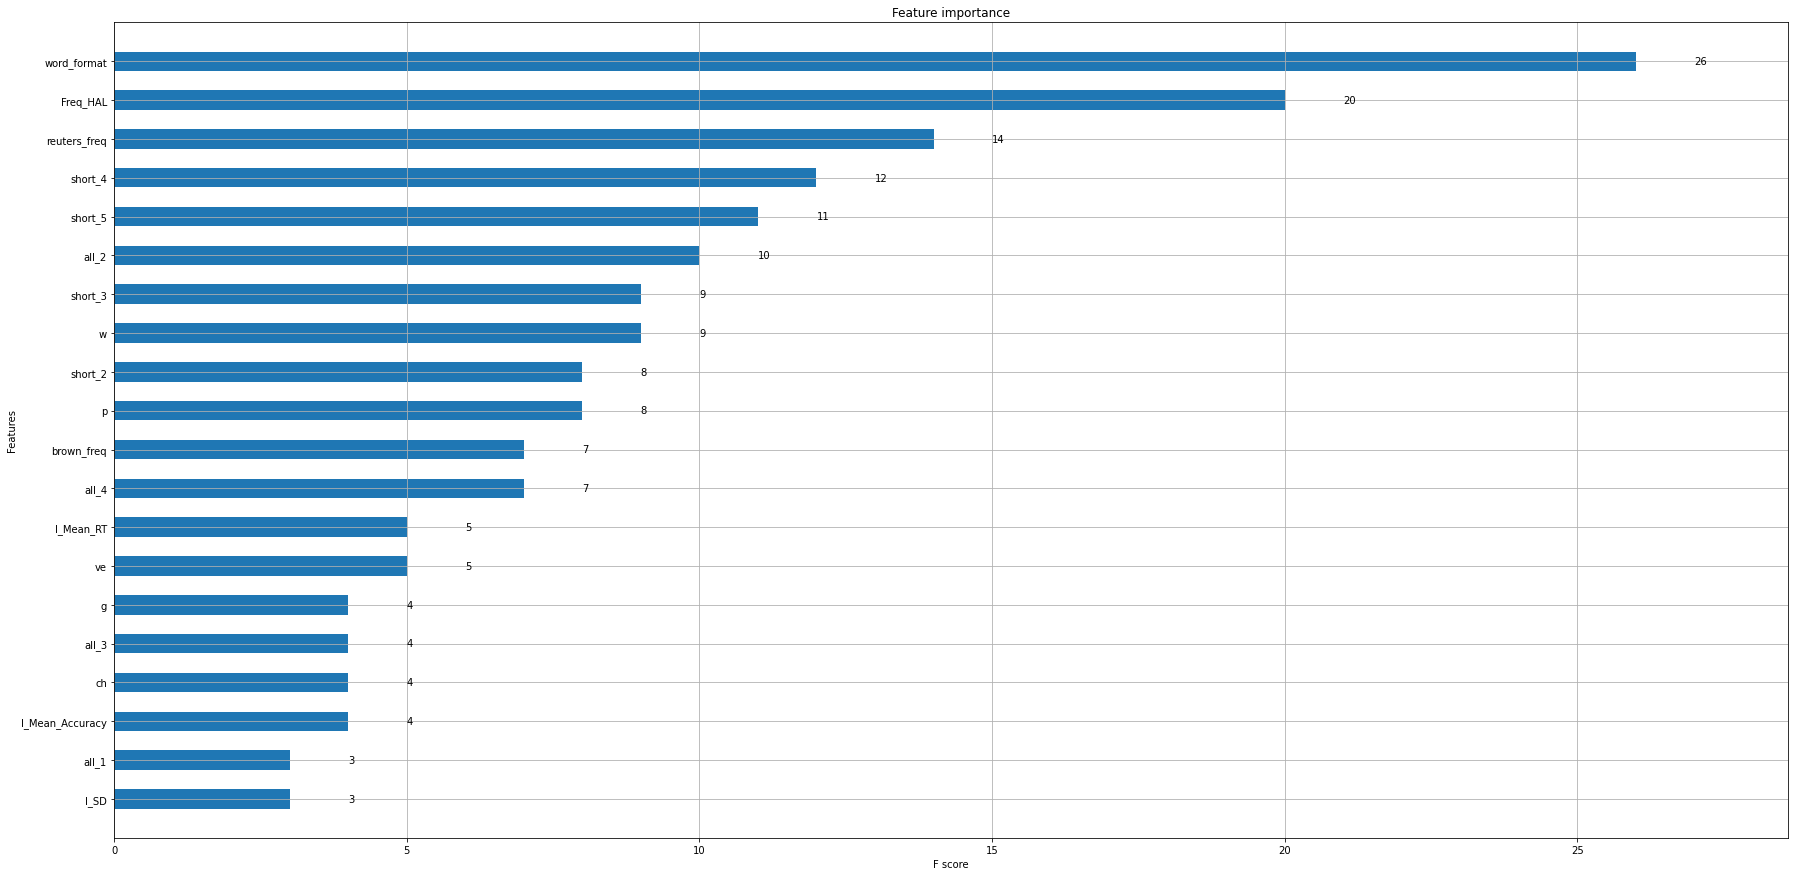

In [57]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(30, 15))
plot_importance(xgb_r,height=0.5,ax=ax,max_num_features=20)
plt.show()
my = xgb_r.feature_importances_[:20]


In [58]:

test_test = test[['word_format',
       'max_word_repetition', 'diff_score', 'syllable', 'brown_freq',
       'reuters_freq', 'Freq_HAL', 'Log_Freq_HAL',
       'I_Mean_RT', 'I_Zscore', 'I_SD', 'Obs', 'I_Mean_Accuracy', 'f', 'g',
       'j', 'm', 'p', 'q', 'v', 'w', 'x', 'z', 'oo', 'ir', 'ph', 'ly', 've',
       'wh', 'sk', 'ch', 'ck', 'ng', 'qu', 'th','ie','short_1',
       'short_2', 'short_3', 'short_4', 'short_5', 'all_1', 'all_2', 'all_3',
       'all_4', 'all_5']]
pred = xgb_r.predict(test_test)
pred

array([1])